# Домашняя работа 4. Гриневская Катя, БКЛ182

### Задание 1. Перевести разметку в датафрейм, подобный тому, что был на семинаре

Сначала импортирую json, так как хочу работать со своим файлом, в котором лежит результат работы Mystem, и свой файл тоже импортирую.

In [3]:
import json
f2_list = []
with open('data.json', encoding='utf-8') as f:
    f2_list = json.load(f)

Затем создаю словари, в каждом из которых ключами являются названия категорий, а значения - возможные значения жтих категорий.

In [45]:
cases_dict = {'им': 'падеж',
              'род': 'падеж',
              'дат': 'падеж',
              'вин': 'падеж',
              'твор': 'падеж',
              'пр': 'падеж',
              'парт': 'падеж',
              'местн': 'падеж',
              'зват': 'падеж'}
time_dict = {'наст': 'время', 'прош': 'время', 'непрош': 'время'}
name_dict = {'имя': 'имя'}
numb_dict = {'ед': 'число', 'мн': 'число'}
verb_mood_dict = {'деепр': 'наклонение',
                  'инф': 'наклонение',
                  'прич': 'наклонение',
                  'изъяв': 'наклонение',
                  'пов': 'наклонение'}
adj_form_dict = {'кр': 'форма прилагательного',
                 'полн': 'форма прилагательного',
                 'притяж': 'форма прилагательного'}
comp_dict = {'прев': 'степень сравнения', 'срав': 'степень сравнения'}
verb_face_dict = {'1-л': 'лицо', '2-л': 'лицо', '3-л': 'лицо'}
gender_dict = {'муж': 'род', 'жен': 'род', 'сред': 'род'}
type_verb_dict = {'несов': 'вид', 'сов': 'вид'}
voice_verb_dict = {'действ': 'залог', 'страд': 'залог'}
anim_dict = {'од': 'одушевленность', 'неод': 'одушевленность'}
trans_dict = {'пе': 'переходность', 'нп': 'переходность'}

Далее создаю список словарей, в котором каждый словарь будет состоять из трех пар (ключ; значение):
    
- word; *слово*
- Часть речи; _часть речи_
- Грам; _грамматические значения_

In [46]:
kyr_list = []
for d in f2_list:
    if 'analysis' in d.keys():
        word_ana = {}
        gram = d['analysis'][0]['gr']
        word_ana['word'] = d['text']
        pos = gram.split('=')[0].split(',')[0]
        word_ana['Часть речи'] = pos
        word_ana['Лексема'] = d['analysis'][0]['lex']
        if '(' in gram:
            gr_2 = gram.split('(')[1].split('|')[0]
            gr = gram.replace('=', ',').split('(')[0]
            gr = gr + ',' + gr_2
        else:
            gr = gram.replace('=', ',')
        word_ana['Грам'] = gr.split(',')[1:]
        kyr_list.append(word_ana)

Затем я хочу привести его в вид, из которого потом можно сделать датафрейм. Для этого мне нужно, чтобы для каждого слова был словарь, в котором указано само слово, его чатсь речи и грамматические признаки. Грамматические принаки могут либо иметь изначение, либо оставаться пустыми.

In [48]:
egg_list = []
for d in kyr_list:
    gr = d['Грам']
    kyr_word = {}
    kyr_word['word'] = d['word']
    kyr_word['Часть речи'] = d['Часть речи']
    kyr_word['Лексема'] = d['Лексема']
    for case in cases_dict.keys():
        if case in gr:
            kyr_word[cases_dict[case]] = case
    if 'падеж' not in kyr_word.keys():
            kyr_word['падеж'] = ''
    for time in time_dict.keys():
        if time in gr:
            kyr_word[time_dict[time]] = time
    if 'время' not in kyr_word.keys():
        kyr_word['время'] = ''
    for name in name_dict.keys():
        if name in gr:
            kyr_word[name_dict[name]] = name
    if 'имя' not in kyr_word.keys():
        kyr_word['имя'] = ''
    for numb in numb_dict.keys():
        if numb in gr:
            kyr_word[numb_dict[numb]] = numb
    if 'число' not in kyr_word.keys():
            kyr_word['число'] = ''
    for mood in verb_mood_dict.keys():
        if mood in gr:
            kyr_word[verb_mood_dict[mood]] = mood
    if 'наклонение' not in kyr_word.keys():
            kyr_word['наклонение'] = ''
    for form in adj_form_dict.keys():
        if form in gr:
            kyr_word[adj_form_dict[form]] = form
    if 'форма прилагательного' not in kyr_word.keys():
            kyr_word['форма прилагательного'] = ''
    for comp in comp_dict.keys():
        if comp in gr:
            kyr_word[comp_dict[comp]] = comp
    if 'степень сравнения' not in kyr_word.keys():
            kyr_word['степень сравнения'] = ''
    for face in verb_face_dict.keys():
        if face in gr:
            kyr_word[verb_face_dict[face]] = face
    if 'лицо' not in kyr_word.keys():
            kyr_word['лицо'] = ''
    for gender in gender_dict.keys():
        if gender in gr:
            kyr_word[gender_dict[gender]] = gender
    if 'род' not in kyr_word.keys():
            kyr_word['род'] = ''
    for v_type in type_verb_dict.keys():
        if v_type in gr:
            kyr_word[type_verb_dict[v_type]] = v_type
    if 'вид' not in kyr_word.keys():
            kyr_word['вид'] = ''
    for voice in voice_verb_dict.keys():
        if voice in gr:
            kyr_word[voice_verb_dict[voice]] = voice
    if 'залог' not in kyr_word.keys():
            kyr_word['залог'] = ''
    for soul in anim_dict.keys():
        if soul in gr:
            kyr_word[anim_dict[soul]] = soul
    if 'одушевленность' not in kyr_word.keys():
            kyr_word['одушевленность'] = ''
    for verb in trans_dict.keys():
        if verb in gr:
            kyr_word[trans_dict[verb]] = verb
    if 'переходность' not in kyr_word.keys():
            kyr_word['переходность'] = ''
    egg_list.append(kyr_word)

Затем импортирую pandas и создаю датафрейм.

In [49]:
import pandas as pd

In [50]:
df = pd.DataFrame(egg_list)
df.head(50)

,word,Лексема,Часть речи,вид,время,залог,имя,лицо,наклонение,одушевленность,падеж,переходность,род,степень сравнения,форма прилагательного,число
0,Я,я,SPRO,,,,,1-л,,,им,,,,,ед
1,уверен,уверенный,A,,,,,,,,,,муж,,кр,ед
2,что,что,CONJ,,,,,,,,,,,,,
3,у,у,PR,,,,,,,,,,,,,
4,моего,мой,APRO,,,,,,,од,вин,,муж,,,ед
5,отца,отец,S,,,,,,,од,вин,,муж,,,ед
6,от,от,PR,,,,,,,,,,,,,
7,природы,природа,S,,,,,,,неод,вин,,жен,,,мн
8,были,быть,V,несов,прош,,,,изъяв,,,нп,,,,мн
9,задатки,задатки,S,,,,,,,неод,вин,,,,,мн


### Задание 2. Повторить какие-то из графиков с семинара на своих книжных данных (обязательно - 3 штуки, дальше по желанию)

Сначала делаю всякие необходимые штуки для построения графиков.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

А затем строю такие же, как в семинаре.

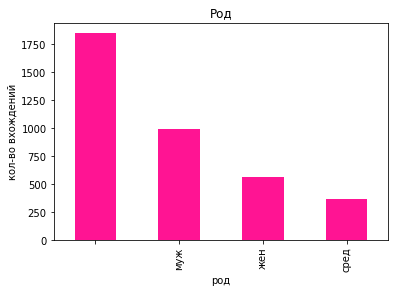

In [38]:
df['род'].value_counts().plot.bar(color='deeppink'); # барплот сразу из датафрейма
plt.title('Род')
plt.xlabel('род')
plt.ylabel('кол-во вхождений');

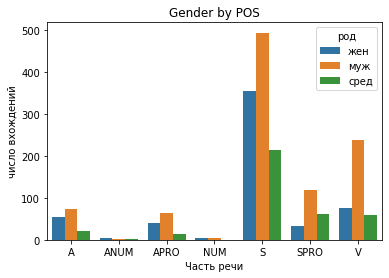

In [39]:
df2 = df[
    (df['род'] != '') & (df['род'] != 'мж')
][
    ['Часть речи', 'род', 'число']
].groupby(['Часть речи', 'род'], as_index=False).count()

df2.columns = ['Часть речи', 'род', 'всего']
sns.barplot(x='Часть речи', y='всего', hue='род', data=df2)
plt.title('Gender by POS')
plt.xlabel('Часть речи')
plt.ylabel('число вхождений');

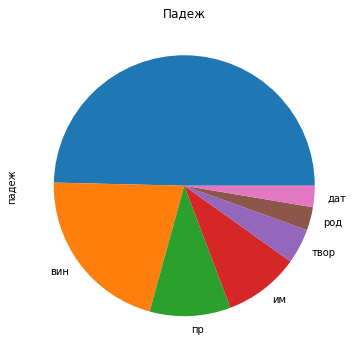

In [40]:
plt.figure(figsize=(6, 6))
df['падеж'].value_counts().plot(kind='pie');
plt.title('Падеж');

### Задание 3. Придумать 2 своих визуализации, которые будут отличаться от того, что есть в конспекте

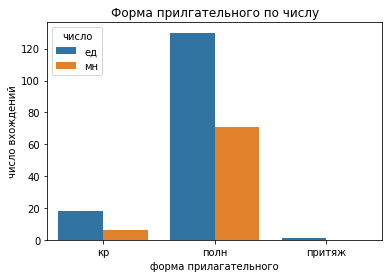

In [41]:
df3 = df[
    (df['Часть речи'] == 'A') & (df['форма прилагательного'] != '')
][
    ['Часть речи', 'форма прилагательного', 'число']
].groupby(['форма прилагательного', 'число'], as_index=False).count()

df3.columns = ['форма прилагательного', 'число', 'всего']
sns.barplot(x='форма прилагательного', y='всего', hue='число', data=df3)
plt.title('Форма прилгательного по числу')
plt.xlabel('форма прилагательного')
plt.ylabel('число вхождений');

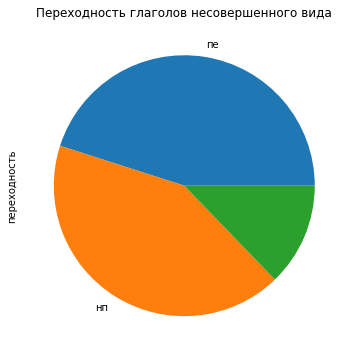

In [42]:
plt.figure(figsize=(6, 6))
df[df['вид'] == 'сов']['переходность'].value_counts().plot(kind='pie');
plt.title('Переходность глаголов несовершенного вида');

### Задание 4. Освоить nltk dispersion plot и сделать такой график по героям вашей книги:
- герои - это упоминания их имен
- используйте лемматизированный текст


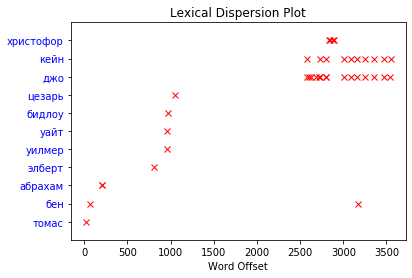

In [63]:
words = []
for lex in egg_list:
    if lex['имя'] == 'имя':
        if lex['Лексема'] not in words:
            words.append(lex['Лексема'])

lex = df['Лексема']

points = [(x, y) for x in range(len(lex))
          for y in range(len(words)) if lex[x] == words[y]]
if points:
    x, y = zip(*points)
else:
    x = y = ()
 
plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()